## Lab 2 

In [1]:
# lägg till inititala moduler/paket 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import cv2
import os



In [2]:
# start EDA

data_path = Path().absolute() / "original_data"
data_path_test=data_path / "test/test"
data_path_train=data_path / "train/train"
print(f"{data_path_test=}")
print(f"{data_path_train=}")

# test 1.jpg - 12500.jpg
# train  cat0.jpg - cat12499.jpg, dog0-12499.jpg



data_path_test=WindowsPath('c:/Source/AI-deep_learning/original_data/test/test')
data_path_train=WindowsPath('c:/Source/AI-deep_learning/original_data/train/train')


type(image) = <class 'numpy.ndarray'>
image.shape = (199, 187, 3)


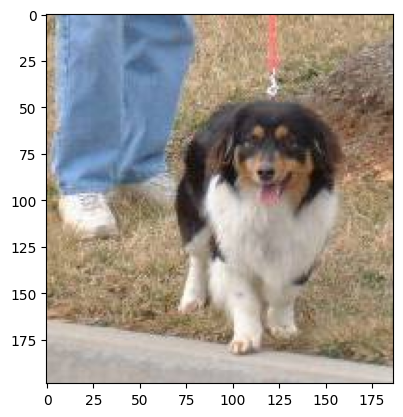

In [3]:
image = plt.imread(data_path_train / "dog.2.jpg")

print(f"{type(image) = }")
# the last dimension indicates that its colors and in 
# open cv it is actually BGR and not RGB 
print(f"{image.shape = }")
min(image.flatten()), max(image.flatten()) 

plt.imshow(image)

Läs in 10 bilder slumpmässigt, plotta dem och extrahera deras labels och skriv ut i titeln.

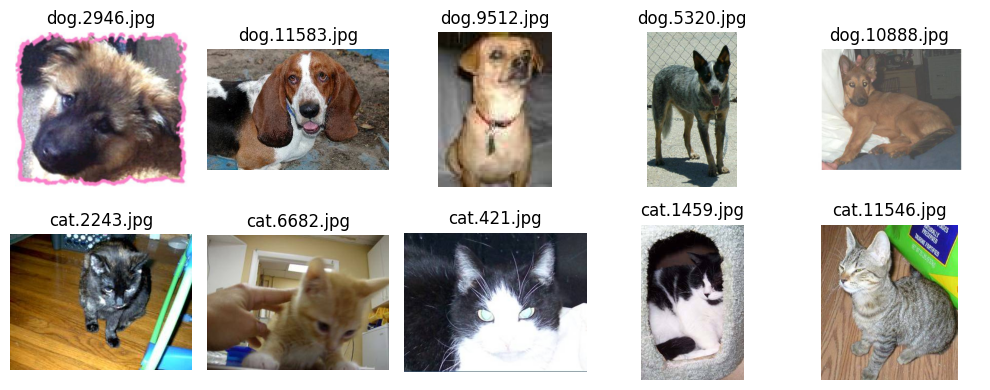

In [4]:
# Funktion för att skapa unika index (till bilder), inspiration från Stack Overflow
# equalizing size to similar
size_x=80
size_y=80

def createImageIndexList(number, start=1, end=100, typeofimage="dog"):   
    pulled_im = []
    label_im=[]
    arr = np.random.choice(np.arange(start, end + 1), size=number, replace=False)
    for index in arr:
        image = typeofimage+ "." + str(index) + ".jpg"
        label_im.append(image)
        what=plt.imread(data_path_train / image)
        # pulled_im.append(cv2.resize(what,(size_x, size_y)))
        pulled_im.append(what)
    return pulled_im, label_im
 
# obtain images of dogs and cats
# train  cat0.jpg - cat12499.jpg, dog0-12499.jpg
dog_images, dog_labels=createImageIndexList(5, 0, 12499, "dog") 
cat_images, cat_labels=createImageIndexList(5, 0, 12499, "cat")

ten_images=dog_images + cat_images
ten_labels=dog_labels + cat_labels
#print(createImageIndexList(5))

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flatten()):
    # resized_image = cv2.resize(image, new_size)
    ax.imshow(ten_images[i])
    ax.axis("off")
    ax.set_title(f"{ten_labels[i]}")
fig.tight_layout()


 Skapa folderstrukturen nedan med Python:
 .
├── experiment_small_data
│   ├── test
│   ├── train
│   └── val
├── experiment_tiny_data
│   ├── test
│   ├── train
│   └── val
├── lab.ipynb 
└── original_data
 ├── test
 │   └── test
 └── train
     └── train

In [5]:
# with som influence from Stack Overflow

def create_folderstruct(main_folder):
    path = Path(main_folder)
    # Check whether the specified path exists or not
    isExist = os.path.exists(path)
    if not isExist:
        # Create a new directory because it does not exist
        os.makedirs(path)
        os.mkdir(path / "test")
        os.mkdir(path / "train")
        os.mkdir(path / "val")
        print("The new directory is created!")

create_folderstruct("experiment_small_data")
create_folderstruct("experiment_tiny_data")


train|val|test split med följande splits:
    experiment_small
        train - 1600 (800 dogs, 800 cats)
        val - 400 (200 dogs, 200 cats)
        test - 500 (250 dogs, 250 cats)
    experiment_tiny (BONUS)
        train - 160 (80 dogs, 80 cats)
        val - 40 (20 dogs, 20 cats)
        test - 50 (25 dogs, 25 cats)
Det är inte så farligt om det inte blir exakt balanserade dataset.
Det är viktigt att du samplar slumpmässigt utan replacement från originaldatasetet under respektive
experiment. Spara datan i deras respektive mappar.

Experiment small - split och spara data

In [6]:
from sklearn.model_selection import train_test_split
import pickle

# experimental small
dog_images, dog_labels=createImageIndexList(1250, 0, 12499, "dog") 
cat_images, cat_labels=createImageIndexList(1250, 0, 12499, "cat")

# initial split - obs x_test och y_test måste sättas om till 1 (dog) resp 0 (cat) 

train_label_dogs=["Dog" for i in dog_labels]
train_label_cats=["Cat" for i in cat_labels]

X_train_dogs, X_test_dogs, y_train_dogs, y_test_dogs = train_test_split(
    dog_images, train_label_dogs, test_size=0.2, random_state=42)

# split X_train så vi får ett validerings set
X_train2_dogs, X_val_dogs, y_train2_dogs, y_val_dogs = train_test_split(
    X_train_dogs, y_train_dogs, test_size=0.2, random_state=42)


X_train_cats, X_test_cats, y_train_cats, y_test_cats = train_test_split(
    cat_images, train_label_cats, test_size=0.2, random_state=42)

# split X_train så vi får ett validerings set
X_train2_cats, X_val_cats, y_train2_cats, y_val_cats = train_test_split(
    X_train_cats, y_train_cats, test_size=0.2, random_state=42)

# merge dogs and cats data, full set
X_train=X_train_dogs + X_train_cats
y_train = y_train_dogs + y_train_cats
X_test=X_test_dogs + X_test_cats
y_test = y_test_dogs + y_test_cats
# tuning sets
X_train2=X_train2_dogs + X_train2_cats
y_train2=y_train2_dogs + y_train2_cats
X_val=X_val_dogs + X_val_cats
y_val=y_val_dogs + y_val_cats
# Funktion för att spara datan
def save_data(pathfile, the_data):
    f = open(pathfile, 'wb')
    pickle.dump(the_data, f)
    f.close()


save_data("experiment_small_data/train/train.dat", [X_train, y_train])
save_data("experiment_small_data/test/test.dat",[X_test, y_test])
save_data("experiment_small_data/train/train2.dat",[X_train2, y_train2])
save_data("experiment_small_data/val/validate.dat",[X_val, y_val])


Tiny data split och spara 

In [7]:
# experimental tiny
dog_images, dog_labels=createImageIndexList(125, 0, 12499, "dog") 
cat_images, cat_labels=createImageIndexList(125, 0, 12499, "cat")

# initial split - obs x_test och y_test måste sättas om till 1 (dog) resp 0 (cat) 

train_label_dogs=["Dog" for i in dog_labels]
train_label_cats=["Cat" for i in cat_labels]

X_train_dogs, X_test_dogs, y_train_dogs, y_test_dogs = train_test_split(
    dog_images, train_label_dogs, test_size=0.2, random_state=42)

# split X_train så vi får ett validerings set
X_train2_dogs, X_val_dogs, y_train2_dogs, y_val_dogs = train_test_split(
    X_train_dogs, y_train_dogs, test_size=0.2, random_state=42)


X_train_cats, X_test_cats, y_train_cats, y_test_cats = train_test_split(
    cat_images, train_label_cats, test_size=0.2, random_state=42)

# split X_train så vi får ett validerings set
X_train2_cats, X_val_cats, y_train2_cats, y_val_cats = train_test_split(
    X_train_cats, y_train_cats, test_size=0.2, random_state=42)

# merge dogs and cats data, full set
X_train=X_train_dogs + X_train_cats
y_train = y_train_dogs + y_train_cats
X_test=X_test_dogs + X_test_cats
y_test = y_test_dogs + y_test_cats
# tuning sets
X_train2=X_train2_dogs + X_train2_cats
y_train2=y_train2_dogs + y_train2_cats
X_val=X_val_dogs + X_val_cats
y_val=y_val_dogs + y_val_cats



save_data("experiment_tiny_data/train/train.dat", [X_train, y_train])
save_data("experiment_tiny_data/test/test.dat",[X_test, y_test])
save_data("experiment_tiny_data/train/train2.dat",[X_train2, y_train2])
save_data("experiment_tiny_data/val/validate.dat",[X_val, y_val])


Läs in dataseten från experiment_small, experiment_tiny (BONUS) och plocka ut labelsvektorer, som ska vara one-hot encoded med 0 och 1.

Experiment small - läsa data

In [8]:
# Funktion för att läsa data
def load_data(pathfile):
    f = open(pathfile, 'rb')
    obj1, obj2 = pickle.load(f)
    f.close()
    arr = np.random.choice(np.arange(0, len(obj1)), size=len(obj1), replace=False)
    obj3=[obj1[i] for i in arr]
    obj4=[obj2[i] for i in arr]
    return [obj3, obj4]

# Läs in data till variabler
X_train, y_train=load_data("experiment_small_data/train/train.dat")
X_test, y_test=load_data("experiment_small_data/test/test.dat")
X_train2, y_train2 =load_data("experiment_small_data/train/train2.dat")
X_val, y_val=load_data("experiment_small_data/val/validate.dat")

X_train_tiny, y_train_tiny=load_data("experiment_tiny_data/train/train.dat", )
X_test_tiny, y_test_tiny=load_data("experiment_tiny_data/test/test.dat")
X_train2_tiny, y_train2_tiny=load_data("experiment_tiny_data/train/train2.dat")
X_val_tiny, y_val_tiny=load_data("experiment_tiny_data/val/validate.dat")


In [9]:
y_train2

['Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Dog',
 'Dog',
 'Dog',
 'Dog',
 'Dog',
 'Cat',
 'Cat',
 'Cat',
 'Dog',
 'Dog',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Dog',
 'Dog',
 'Dog',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Dog',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Dog',
 'Dog',
 'Dog',
 'Dog',
 'Dog',
 'Cat',
 'Cat',
 'Cat',
 'Dog',
 'Dog',
 'Cat',
 'Cat',
 'Dog',
 'Cat',
 'Dog',
 'Dog',
 'Cat',
 'Dog',
 'Dog',
 'Cat',
 'Dog',
 'Cat',
 'Cat',
 'Cat',
 'Dog',
 'Dog',
 'Cat',
 'Dog',
 'Dog',
 'Cat',
 'Dog',
 'Dog',
 'Dog',
 'Cat',
 'Dog',
 'Cat',
 'Dog',
 'Cat',
 'Dog',
 'Dog',
 'Cat',
 'Dog',
 'Dog',
 'Cat',
 'Cat',
 'Cat',
 'Dog',
 'Cat',
 'Cat',
 'Dog',
 'Dog',
 'Dog',
 'Cat',
 'Dog',
 'Cat',
 'Dog',
 'Dog',
 'Cat',
 'Dog',
 'Dog',
 'Dog',
 'Cat',
 'Dog',
 'Cat',
 'Cat',
 'Dog',
 'Dog',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Dog',
 'Cat',
 'Cat',
 'Cat',
 'Dog',
 'Cat',
 'Cat',
 'Dog',
 'Dog',
 'Cat',
 'Dog',
 'Dog',
 'Dog',
 'Dog',
 'Dog',
 'Cat',
 'Cat',


Ändra till one hot encoding för label vektorer (y_xxxx)

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from numpy import array
from numpy import argmax

# def toOneHot(data):
#     data = data 
#     values = array(data)
#     label_encoder = LabelEncoder()
#     int_encoded = label_encoder.fit_transform(values)
#     encoded = to_categorical(int_encoded)
#     return encoded

def toOneHot(data):
    code=[]
    for x in data:
        if x=='Dog':
            code.append(0)
        else:
            code.append(1)
    return code

# Y_xxx -> y_train, y_test, y_train2, y_val (experimental small)
# y_xxx -> y_train_tiny, y_test_tiny, y_train2_tiny, y_val_tiny

y_train=toOneHot(y_train)
y_test=toOneHot(y_test)
y_train2=toOneHot(y_train2) 
y_val=np.array(toOneHot(y_val))

y_train_tiny=toOneHot(y_train_tiny)
y_test_tiny=toOneHot(y_test_tiny) 
y_train2_tiny=toOneHot(y_train2_tiny) 
y_val_tiny=toOneHot(y_val_tiny)

#y_train2b=BinaryOne(y_train)


In [11]:
y_val


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,

Bilder slumpmässigt valda med label

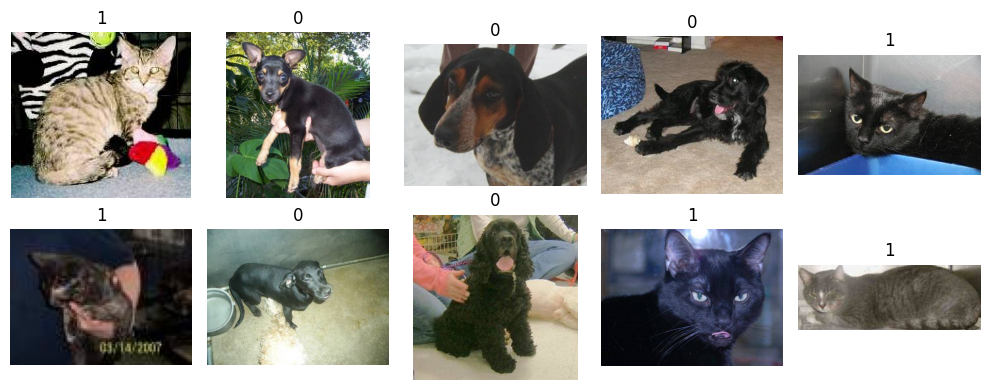

In [12]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flatten()):
    # resized_image = cv2.resize(image, new_size)
    ax.imshow(X_train[i])
    ax.axis("off")
    ax.set_title(f"{y_train[i]}")
fig.tight_layout()

# 1. Bildbehandling

Undersökning av bildstorlek 

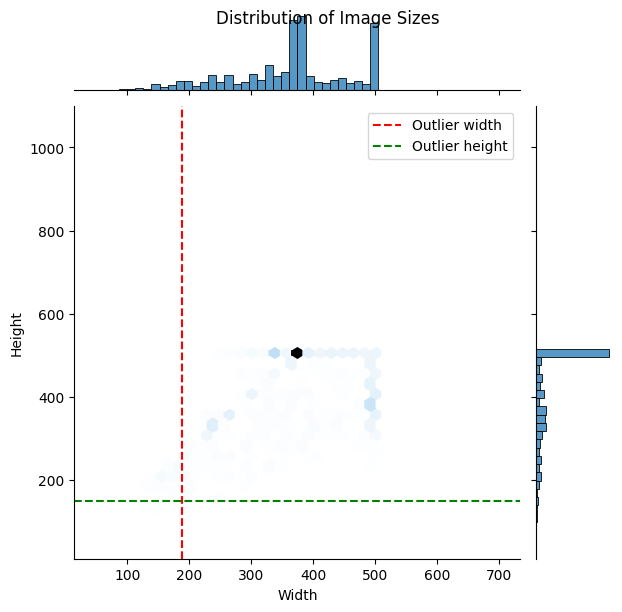

In [13]:
# Storleken för respektive bild till en array, med viss hjälp från chatGPT


image_sizes = np.array([img.shape[:2] for img in X_train])
image_sizes2 = np.array([img.shape[:2] for img in X_train2])


width_q1 = np.percentile(image_sizes[:, 0], 25)
height_q1 = np.percentile(image_sizes[:, 1], 25)

width_q3 = np.percentile(image_sizes[:, 0], 75)
height_q3 = np.percentile(image_sizes[:, 1], 75)

qv_w = width_q3-width_q1
qv_h = height_q3-height_q1

# Skapa en  joint plot
joint_plot =sns.jointplot(x=image_sizes[:, 0], y=image_sizes[:, 1], kind="hex", marginal_kws=dict(bins=50, fill=True))

joint_plot.ax_joint.axvline(width_q1-qv_w, color='r', linestyle='--', label='Outlier width')
joint_plot.ax_joint.axhline(height_q1-qv_h, color='g', linestyle='--', label='Outlier height')

plt.xlabel('Width')
plt.ylabel('Height')
plt.suptitle('Distribution of Image Sizes')
plt.legend()
plt.show()

Välj en lämplig bildstorlek att ändra samtliga bilder till. Gör en analys och fundera på om du behöver slänga bilder. Hur kommer du fram till ditt val?

Analys - plocka fram uteliggare för bildstorlek (utanför 1.5 * kvartilavståndet), obs endast bilder med låg upplösning (mindre än q1-1.5*kvatilavstånd)

Tar inte bort ur test data eller validering (då dessaär få och för att få CNN att generalisera utifrån "bra data")

Utgå från X_train sizes då detta har 2000 (större än X_train2) vid beräkning av uteliggare.

In [14]:

def scan_image_size(image_sizes_in):
    j=0
    remove_list=[]
    for i,x in enumerate(image_sizes_in):
        if ((image_sizes_in[i][0]<=((width_q1-qv_w*1.5))) | 
            (image_sizes_in[i][1]<=(height_q1-qv_h*1.5)) ):
            remove_list.append(i)
    tmp = sorted(remove_list, reverse=True)
    return tmp

# ta bort bilder från X_train/y_train som är uteliggare för hela dataset
# obs - tar inte bort x_test, använder det ev. för analys av generaliseringsförmåga  
rm_which = scan_image_size(image_sizes)
y_train=np.delete(y_train, rm_which,axis=0)
for x in rm_which:
    X_train.pop(x)

# ta bort från X_train2

rm_which = scan_image_size(image_sizes2)
y_train2= np.delete(y_train2, rm_which, axis=0)
for x in rm_which:
     X_train2.pop(x)




#print(len(X_train), len(X_train2)), print( rm_which)


In [15]:
print(len(y_train), len(X_train), len(y_train2), len(X_train2))

1971 1971 1577 1577


Göra om bilderna till en enhetlig storlek, t.ex. (150,150), (180,200), (120,120)


In [16]:
# inital setup - start with smallest (120,120)
# image_resize= np.array([cv2.reshape(image, (width, height)) for image in images])

size_x=120
size_y=120

def scale_images(image_arr):
    #output_arr = []
    #for image in image_arr:
        # output_arr.append(cv2.resize(image,(size_x, size_y)))
    output_arr = np.array([cv2.resize(image, (size_x, size_y)) for image in image_arr])
    return output_arr


X_train_scaled = scale_images(X_train)
X_train2_scaled = scale_images(X_train2)
X_test_scaled = scale_images(X_test)
X_val_scaled = scale_images(X_val)


X_train_scaled = X_train_scaled/255
X_train2_scaled = X_train2_scaled/255
X_test_scaled = X_test_scaled/255
X_val_scaled = X_val_scaled/255


Check the image array of image, row, col, color_channels, i.e. image 0 has (120, 120, 3)

In [17]:
X_train_scaled.min(), X_train_scaled.max(), X_train2_scaled.max(), X_test_scaled.max(), X_val_scaled.max()

(0.0, 1.0, 1.0, 1.0, 1.0)

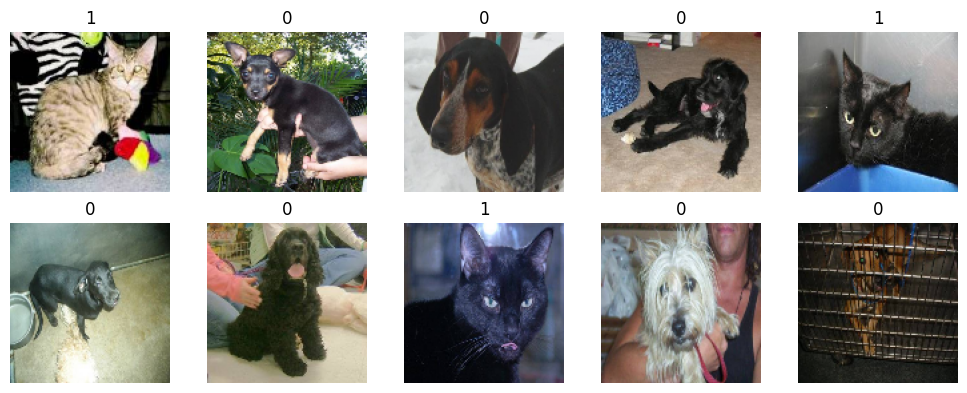

In [18]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flatten()):
    # resized_image = cv2.resize(image, new_size)
    ax.imshow(X_train_scaled[i])
    ax.axis("off")
    ax.set_title(f"{y_train[i]}")
fig.tight_layout()

Augument data

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# help(ImageDataGenerator())

train_image_generator = ImageDataGenerator(
    rotation_range=35, # 35 grader rotation 
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,# tillåt flip  (spegelvänd bild)
    vertical_flip=False, 
    height_shift_range=0.1,
    width_shift_range=0.1,
)
# don't augment test data and validation data as we want to test on original data
# we just instantiate an ImageDataGenerator without augmentation
test_image_generator = ImageDataGenerator()

# batch size 32 for mini-batch gradient descent - gives stocasticity (avoid local minima)
# flow used for regenerating images after it has been exhausted
# this beacause we will train in many epochs
train_val_generator = train_image_generator.flow(
    X_train_scaled, np.array(y_train), batch_size=32
)

# batch size 32 for mini-batch gradient descent 
train_generator = train_image_generator.flow(
    X_train2_scaled, np.array(y_train2), batch_size=32
)

# train_generator[0][0].shape -> a 32 images batch

val_generator = test_image_generator.flow(X_val_scaled, np.array(y_val), batch_size=32)

# NumpyArrayIterator
#train_val_generator, val_generator[0]

In [20]:
X_train_scaled.min(), X_train_scaled.max(), X_train_scaled.shape

(0.0, 1.0, (1971, 120, 120, 3))

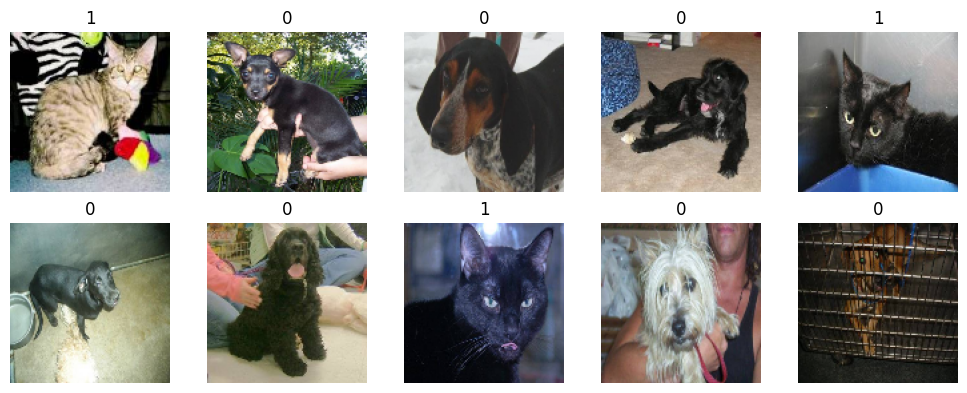

In [46]:
def plot_samples(data, label):
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i], cmap = "gray")
        ax.axis("off")
        ax.set_title(f"{label[i]}")
    fig.tight_layout()

def plot_samples2(data):
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i], cmap = "gray")
        ax.axis("off")
    fig.tight_layout()

plot_samples(X_train_scaled, y_train)

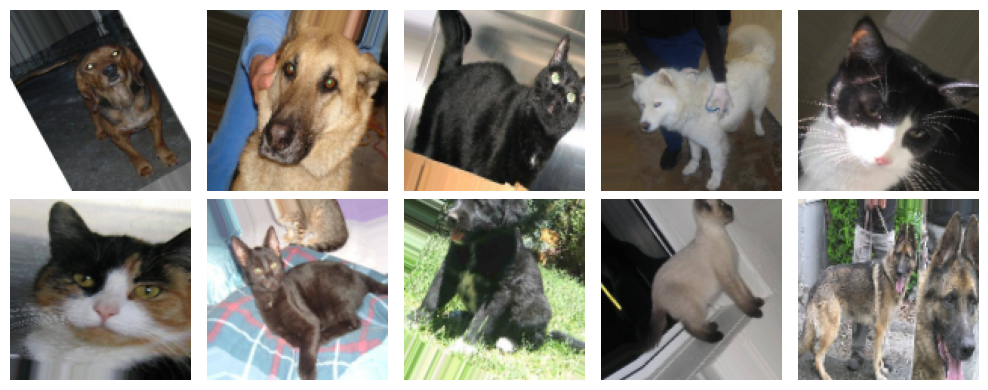

In [22]:
plot_samples2(next(train_generator)[0])

## 2. Train with and without data augumentation

- SMALL DATASET

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam


# initial model - outputlayer softmax with two nodes
def CNN_model(learning_rate=0.001, drop_rate=0.3, kernels=[32, 64]):

    print(drop_rate)
    # default learning rate in Adam, Adam is an optimizor for learning rate
    adam = Adam(learning_rate=learning_rate)

    model = Sequential(name="CNN_model")

    # creating a convulutional layer 
    for number_kernel in kernels:
        conv_layer = Conv2D(
            number_kernel, # number of kernels in each layer
            kernel_size=(3, 3), # also (5,5), (7,7) - filter size
            activation="relu", # good startingpoint
            kernel_initializer="he_normal", # initilazing weights, good to use with relu
            input_shape=X_train_scaled.shape[1:], # 32x32x3
        )

        model.add(conv_layer)
        # defaults to pool_size if None
        model.add(MaxPooling2D(pool_size=(2, 2), strides = 2)) # these can also be tuned

    model.add(Flatten())
    model.add(Dropout(drop_rate))
    model.add(Dense(512, activation="relu", kernel_initializer="he_normal"))
    model.add(Dense(2, activation="softmax")) # sotfmax -> probabilities for each output

    model.compile(
        loss="sparse_categorical_crossentropy", optimizer=adam, metrics=["acc"]
    )

    return model

model = CNN_model(.001, .5, [32, 64, 128, 128])

model.summary()




0.5


c:\Source\AI-deep_learning\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 118, 118, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 57, 57, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,638,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,880,770 (7.17 MB)

 Trainable params: 1,880,770 (7.17 MB)

 Non-trainable params: 0 (0.00 B)

Small set 

In [24]:
# number of steps for minibatch in one epoch
steps_per_epochs = len(X_train2_scaled)/32
validation_steps = len(X_val_scaled)/32
# number of batches to be run in one epoch
steps_per_epochs, validation_steps

(49.28125, 12.5)

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(
    monitor="val_acc", mode="max", patience=150, restore_best_weights=True
)

model.fit(
    train_val_generator,
    steps_per_epoch=int(steps_per_epochs),
    epochs=200,
    callbacks=[early_stopper],
    validation_data=val_generator,
    validation_steps=int(validation_steps),
)


Epoch 1/200


c:\Source\AI-deep_learning\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/49 ━━━━━━━━━━━━━━━━━━━━ 24s 416ms/step - acc: 0.4957 - loss: 1.0756 - val_acc: 0.5521 - val_loss: 0.6897
Epoch 2/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - acc: 0.5020 - loss: 0.6994 - val_acc: 0.5000 - val_loss: 0.6891
Epoch 3/200


C:\Users\Lund\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 409ms/step - acc: 0.5027 - loss: 0.6925 - val_acc: 0.5156 - val_loss: 0.6872
Epoch 4/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - acc: 0.5584 - loss: 0.6843 - val_acc: 0.8750 - val_loss: 0.6680
Epoch 5/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 25s 496ms/step - acc: 0.5292 - loss: 0.6860 - val_acc: 0.5312 - val_loss: 0.6858
Epoch 6/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - acc: 0.5827 - loss: 0.6989 - val_acc: 0.6875 - val_loss: 0.6087
Epoch 7/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 24s 483ms/step - acc: 0.5409 - loss: 0.6885 - val_acc: 0.5078 - val_loss: 0.6929
Epoch 8/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - acc: 0.5070 - loss: 0.6994 - val_acc: 0.5000 - val_loss: 0.6940
Epoch 9/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 24s 475ms/step - acc: 0.5253 - loss: 0.6888 - val_acc: 0.5964 - val_loss: 0.6777
Epoch 10/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - acc: 0.6299 - loss: 0.6736 - val_acc: 0.7500 - val_loss: 0.6021
Epoch 11/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 444ms/step -

CNN model: Output softmax, sparse categorical crossentropy: två output nodes
Data: augumenterad
Analys: Nedan stående figur visar täcken på bra anpassning, dvs en bra modell med generaliseringsförmåga 


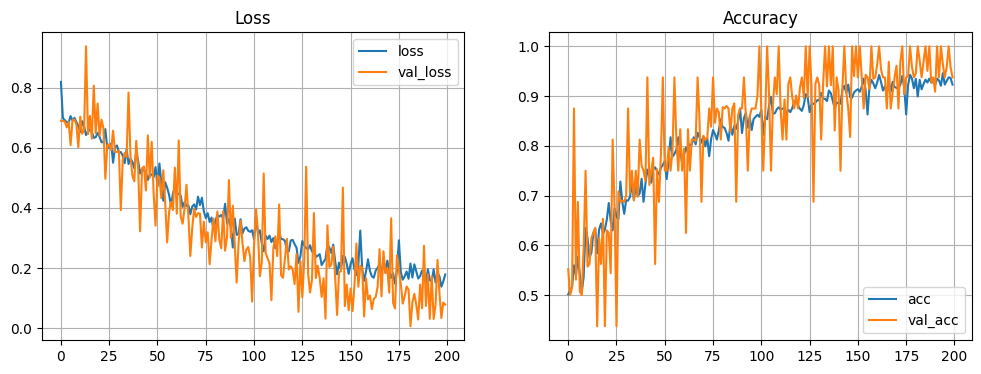

In [26]:
# utvärdering

metrics = pd.DataFrame(model.history.history)
metrics.head()

def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True)
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True)

plot_metrics(metrics)
# val accuracy is higher than train accuracy, probably due to train data being
# augmented, which gives a lot of varieties in data and is harder to overfit

In [27]:
min(y_train),max(y_train),min(y_train2),max(y_train2), min(y_val),max(y_val) 

(0, 1, 0, 1, 0, 1)

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

model2 = CNN_model(.001, .5, [32, 64, 128, 128])

# want to minimize monitored metric (val_loss)
early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=100)

model2.fit(
    X_train_scaled,
    y_train,
    epochs=200,
    callbacks=[early_stopper],
    validation_split=1 / 5,
)

0.5


c:\Source\AI-deep_learning\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 368ms/step - acc: 0.5416 - loss: 1.9514 - val_acc: 0.5316 - val_loss: 0.6895
Epoch 2/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 412ms/step - acc: 0.5334 - loss: 0.6904 - val_acc: 0.4937 - val_loss: 0.7076
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 438ms/step - acc: 0.5378 - loss: 0.6877 - val_acc: 0.5595 - val_loss: 0.6900
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 383ms/step - acc: 0.5627 - loss: 0.6793 - val_acc: 0.5519 - val_loss: 0.6820
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 399ms/step - acc: 0.5635 - loss: 0.6711 - val_acc: 0.6380 - val_loss: 0.6649
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 420ms/step - acc: 0.5807 - loss: 0.6776 - val_acc: 0.6228 - val_loss: 0.6643
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 384ms/step - acc: 0.6202 - loss: 0.6508 - val_acc: 0.6557 - val_loss: 0.6337
Epoch 8/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 392ms/step - acc: 0.6304 - loss: 0.6312 - val_acc: 0.6582 - val_loss: 0.6352
Epoch 9/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 2

CNN model: Output softmax, sparse categorical crossentropy: två output nodes
Data: standard (icke augumenterad)
Analys: Nedan stående figur visar täcken på overfitting, dvs en för komplex modell och dålig generaliseringsförmåga 

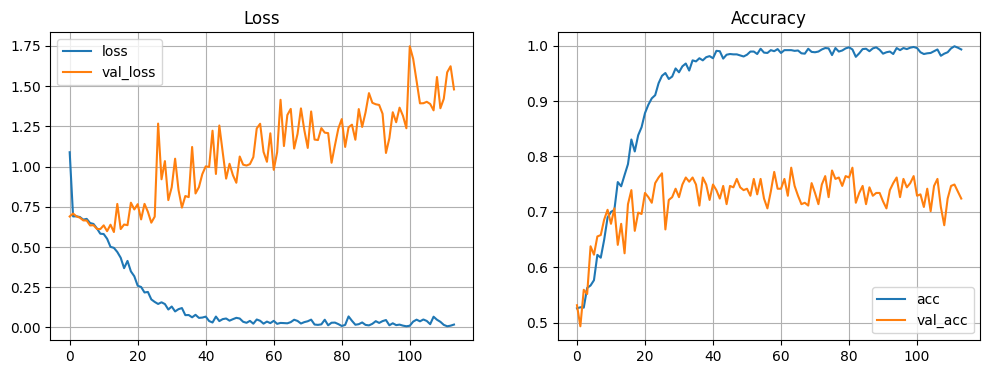

In [29]:
metrics2 = pd.DataFrame(model2.history.history)
metrics2.head()

plot_metrics(metrics2)

CNN model: Output sigmoid, Binary Crossen tropy: en output node och data augumenterad

In [30]:
# model with one output node and sigmoid activation

def CNN_model2(learning_rate=0.001, drop_rate=0.3, kernels=[32, 64]):

    print(drop_rate)
    # default learning rate in Adam, Adam is an optimizor for learning rate
    adam = Adam(learning_rate=learning_rate)

    model = Sequential(name="CNN_model3")

    # creating a convulutional layer 
    for number_kernel in kernels:
        conv_layer = Conv2D(
            number_kernel, # number of kernels in each layer
            kernel_size=(3, 3), # also (5,5), (7,7) - filter size
            activation="relu", # good startingpoint
            kernel_initializer="he_normal", # initilazing weights, good to use with relu
            input_shape=X_train_scaled.shape[1:], # 32x32x3
        )

        model.add(conv_layer)
        # defaults to pool_size if None
        model.add(MaxPooling2D(pool_size=(2, 2), strides = 2)) # these can also be tuned

    model.add(Flatten())
    model.add(Dropout(drop_rate))
    model.add(Dense(512, activation="relu", kernel_initializer="he_normal"))
    model.add(Dense(1, activation="sigmoid")) # sotfmax -> probabilities for each output

    model.compile(
        loss="BinaryCrossentropy", optimizer=adam, metrics=["acc"]
    )

    return model

model3 = CNN_model2(.001, .5, [32, 64, 128, 128])

model3.summary()

0.5


c:\Source\AI-deep_learning\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "CNN_model3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 118, 118, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 57, 57, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     1,638,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,880,257 (7.17 MB)

 Trainable params: 1,880,257 (7.17 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# kör modellen

model3.fit(
    train_val_generator,
    steps_per_epoch=int(steps_per_epochs),
    epochs=200,
    callbacks=[early_stopper],
    validation_data=val_generator,
    validation_steps=int(validation_steps),
)


Epoch 1/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 25s 437ms/step - acc: 0.4909 - loss: 1.3727 - val_acc: 0.4974 - val_loss: 0.6970
Epoch 2/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - acc: 0.5054 - loss: 0.6978 - val_acc: 0.5000 - val_loss: 0.6952
Epoch 3/200


C:\Users\Lund\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 416ms/step - acc: 0.5000 - loss: 0.6931 - val_acc: 0.5521 - val_loss: 0.6909
Epoch 4/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - acc: 0.4701 - loss: 0.6946 - val_acc: 0.6250 - val_loss: 0.6866
Epoch 5/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 417ms/step - acc: 0.5057 - loss: 0.6926 - val_acc: 0.5755 - val_loss: 0.6887
Epoch 6/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - acc: 0.5258 - loss: 0.6912 - val_acc: 0.6250 - val_loss: 0.6908
Epoch 7/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 419ms/step - acc: 0.5102 - loss: 0.6952 - val_acc: 0.5339 - val_loss: 0.6907
Epoch 8/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - acc: 0.5368 - loss: 0.6921 - val_acc: 0.5000 - val_loss: 0.6903
Epoch 9/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 422ms/step - acc: 0.5217 - loss: 0.6901 - val_acc: 0.5182 - val_loss: 0.6892
Epoch 10/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - acc: 0.4788 - loss: 0.6941 - val_acc: 0.4375 - val_loss: 0.6975
Epoch 11/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 419ms/step - ac

CNN model: Output sigmoid, Binary Crossen tropy: en output node
Data: augumenterad
Analys: Nedan stående figur visar täcken på good fit, dvs en bra modell och generaliseringsförmåga

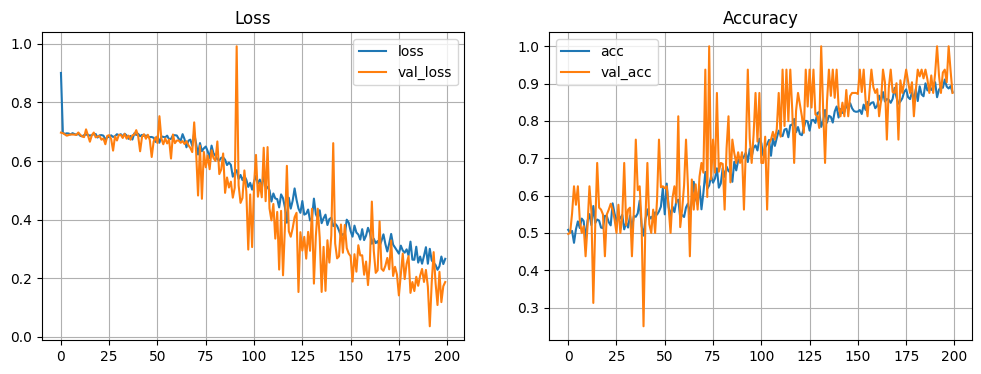

In [32]:
metrics3 = pd.DataFrame(model3.history.history)
metrics3.head()

plot_metrics(metrics3)

CNN model med sigmoid output, binary crossentropy, en output node och raw (icke augumenterad) data

In [37]:
model4 = CNN_model2(.001, .5, [32, 64, 128, 128])

# want to minimize monitored metric (val_loss)
# early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=100)

model4.fit(
    X_train_scaled,
    y_train,
    epochs=200,
    callbacks=[early_stopper],
    validation_split=1 / 5,
)

0.5


c:\Source\AI-deep_learning\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 414ms/step - acc: 0.4904 - loss: 0.9848 - val_acc: 0.5418 - val_loss: 0.6806
Epoch 2/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 381ms/step - acc: 0.5293 - loss: 0.6985 - val_acc: 0.5190 - val_loss: 0.7064
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 403ms/step - acc: 0.5426 - loss: 0.6986 - val_acc: 0.5190 - val_loss: 0.7016
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 389ms/step - acc: 0.6425 - loss: 0.6461 - val_acc: 0.6304 - val_loss: 0.6542
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 386ms/step - acc: 0.6606 - loss: 0.6180 - val_acc: 0.6861 - val_loss: 0.6151
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 366ms/step - acc: 0.6802 - loss: 0.6038 - val_acc: 0.6759 - val_loss: 0.6082
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 369ms/step - acc: 0.7071 - loss: 0.5696 - val_acc: 0.6380 - val_loss: 0.6475
Epoch 8/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 369ms/step - acc: 0.7388 - loss: 0.5209 - val_acc: 0.7139 - val_loss: 0.5498
Epoch 9/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1

CNN model: Output sigmoid, binary crossentropy: en output node
Data: standard (icke augumenterad)
Analys: Nedan stående figur visar täcken på overfitting, dvs en för komplex modell och dålig generaliseringsförmåga 

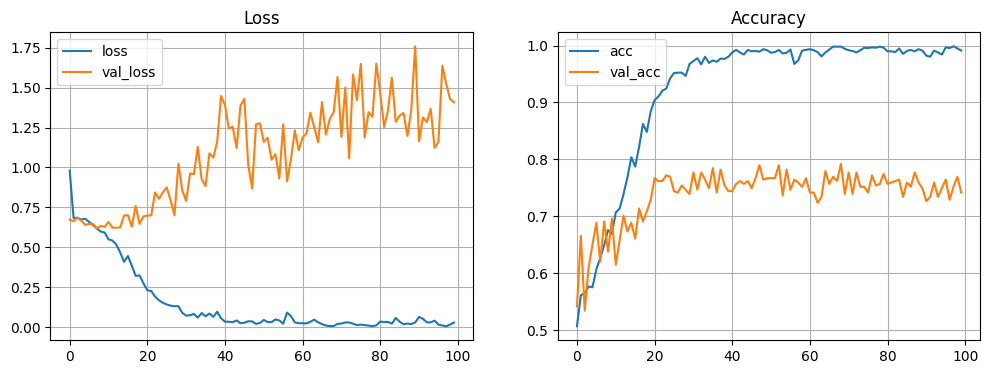

In [36]:
metrics4 = pd.DataFrame(model4.history.history)
metrics4.head()

plot_metrics(metrics4)

# Förändra nätverket och experimentera och ändra i lite komponenter
- kollar på dropout rate (med reducerad learningrate), använder CNN_model2

In [42]:
from keras.callbacks import ReduceLROnPlateau

# dropout 
model5 = CNN_model2(.001, .3, [32, 64, 128, 128])

early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=30)

# inspirerad från Stack Overflow
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=30, min_lr=0.00001)



model5.fit(
    train_val_generator,
    steps_per_epoch=int(steps_per_epochs),
    epochs=200,
    callbacks=[early_stopper, reduce_lr],
    validation_data=val_generator,
    validation_steps=int(validation_steps),
    )




0.3


c:\Source\AI-deep_learning\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 26s 444ms/step - acc: 0.4964 - loss: 1.5112 - val_acc: 0.5000 - val_loss: 0.6962 - learning_rate: 0.0010
Epoch 2/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - acc: 0.5083 - loss: 0.6987 - val_acc: 0.6250 - val_loss: 0.6931 - learning_rate: 0.0010
Epoch 3/200


C:\Users\Lund\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 413ms/step - acc: 0.5457 - loss: 0.6923 - val_acc: 0.5365 - val_loss: 0.6824 - learning_rate: 0.0010
Epoch 4/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - acc: 0.5008 - loss: 0.6867 - val_acc: 0.5000 - val_loss: 0.7151 - learning_rate: 0.0010
Epoch 5/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 426ms/step - acc: 0.5820 - loss: 0.6695 - val_acc: 0.6302 - val_loss: 0.6644 - learning_rate: 0.0010
Epoch 6/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - acc: 0.5935 - loss: 0.6850 - val_acc: 0.3750 - val_loss: 0.8028 - learning_rate: 0.0010
Epoch 7/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 423ms/step - acc: 0.5870 - loss: 0.6717 - val_acc: 0.5964 - val_loss: 0.6629 - learning_rate: 0.0010
Epoch 8/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - acc: 0.5929 - loss: 0.6744 - val_acc: 0.6250 - val_loss: 0.6370 - learning_rate: 0.0010
Epoch 9/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 428ms/step - acc: 0.6144 - loss: 0.6608 - val_acc: 0.6276 - val_loss: 0.6390 - learning_rate: 0.0010
Epoch 10/2

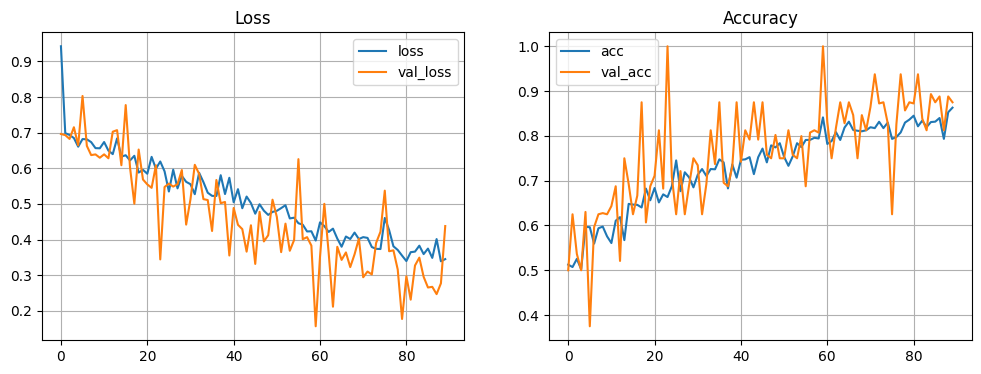

In [43]:
metrics5 = pd.DataFrame(model5.history.history)
metrics5.head()

plot_metrics(metrics5)

In [44]:
model6 = CNN_model2(.001, .7, [32, 64, 128, 128])

early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=30)

# inspirerad från Stack Overflow
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=30, min_lr=0.00001)



model6.fit(
    train_val_generator,
    steps_per_epoch=int(steps_per_epochs),
    epochs=200,
    callbacks=[early_stopper, reduce_lr],
    validation_data=val_generator,
    validation_steps=int(validation_steps),
    )


0.7


c:\Source\AI-deep_learning\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 513ms/step - acc: 0.5163 - loss: 1.1049 - val_acc: 0.5078 - val_loss: 0.6922 - learning_rate: 0.0010
Epoch 2/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - acc: 0.5316 - loss: 0.6899 - val_acc: 0.2500 - val_loss: 0.7790 - learning_rate: 0.0010
Epoch 3/200


C:\Users\Lund\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 457ms/step - acc: 0.5439 - loss: 0.6920 - val_acc: 0.5130 - val_loss: 0.6902 - learning_rate: 0.0010
Epoch 4/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - acc: 0.5347 - loss: 0.6933 - val_acc: 0.5000 - val_loss: 0.6972 - learning_rate: 0.0010
Epoch 5/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 463ms/step - acc: 0.5404 - loss: 0.6939 - val_acc: 0.5911 - val_loss: 0.6818 - learning_rate: 0.0010
Epoch 6/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - acc: 0.5580 - loss: 0.6813 - val_acc: 0.5000 - val_loss: 0.6611 - learning_rate: 0.0010
Epoch 7/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 458ms/step - acc: 0.5498 - loss: 0.6901 - val_acc: 0.5182 - val_loss: 0.6834 - learning_rate: 0.0010
Epoch 8/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - acc: 0.5281 - loss: 0.6938 - val_acc: 0.6875 - val_loss: 0.6710 - learning_rate: 0.0010
Epoch 9/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 454ms/step - acc: 0.5616 - loss: 0.6808 - val_acc: 0.5260 - val_loss: 0.6769 - learning_rate: 0.0010
Epoch 10

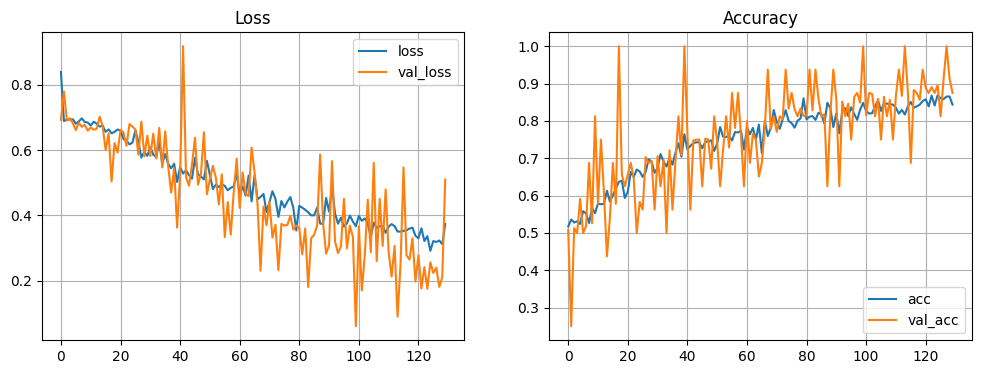

In [45]:
metrics6 = pd.DataFrame(model6.history.history)
metrics6.head()

plot_metrics(metrics6)

Tiny dataset

X_train_tiny, y_train_tiny train in train/test
X_test_tiny, y_test_tiny test in train/test.dat"
X_train2_tiny, y_train2_tiny=load_data("experiment_tiny_data/train/train2.dat")
X_val_tiny, y_val_tiny=load_data("experiment_tiny_data/val/validate.dat")